# Image Filtering

## Linear shift-invariant filtering

- Replace each pixel by a linearcombination of its neighbors (and possibly itself)
- The combination is determined by the filter's kernel
- The same kernel is shiftedto all pixel locations so that all pixels use the same linear combination of their neighbors

### Importing libraries

In [2]:
%pylab inline
#%matplotlib notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


### Some utility functions

In [4]:
#display image
def displayImg(img):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Box filter

It is a kind of filter that can performs linear shift-variant filtering. Application of this filter gives a smooting or blurring effect.

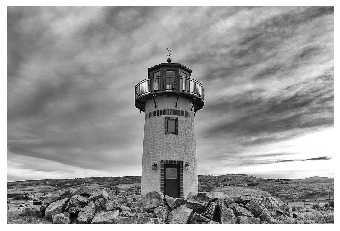

In [3]:
#define a box filter
filterSize = 5
boxFilter = (1/filterSize**2) * np.ones((filterSize,filterSize))

#read image
img = cv2.imread("images/lighthouse.jpg",0)
h, w = img.shape

#pad image
paddingThickness = filterSize//2
paddedImg = np.pad(img, paddingThickness,constant_values=(0))
displayImg(img)

#### Apply box filter to image

In [4]:
resImg = np.array([[(boxFilter*paddedImg[y:y+filterSize,x:x+filterSize]).sum() for x in range(w)] for y in range(h)],'uint8')

#### Result after applying box filter

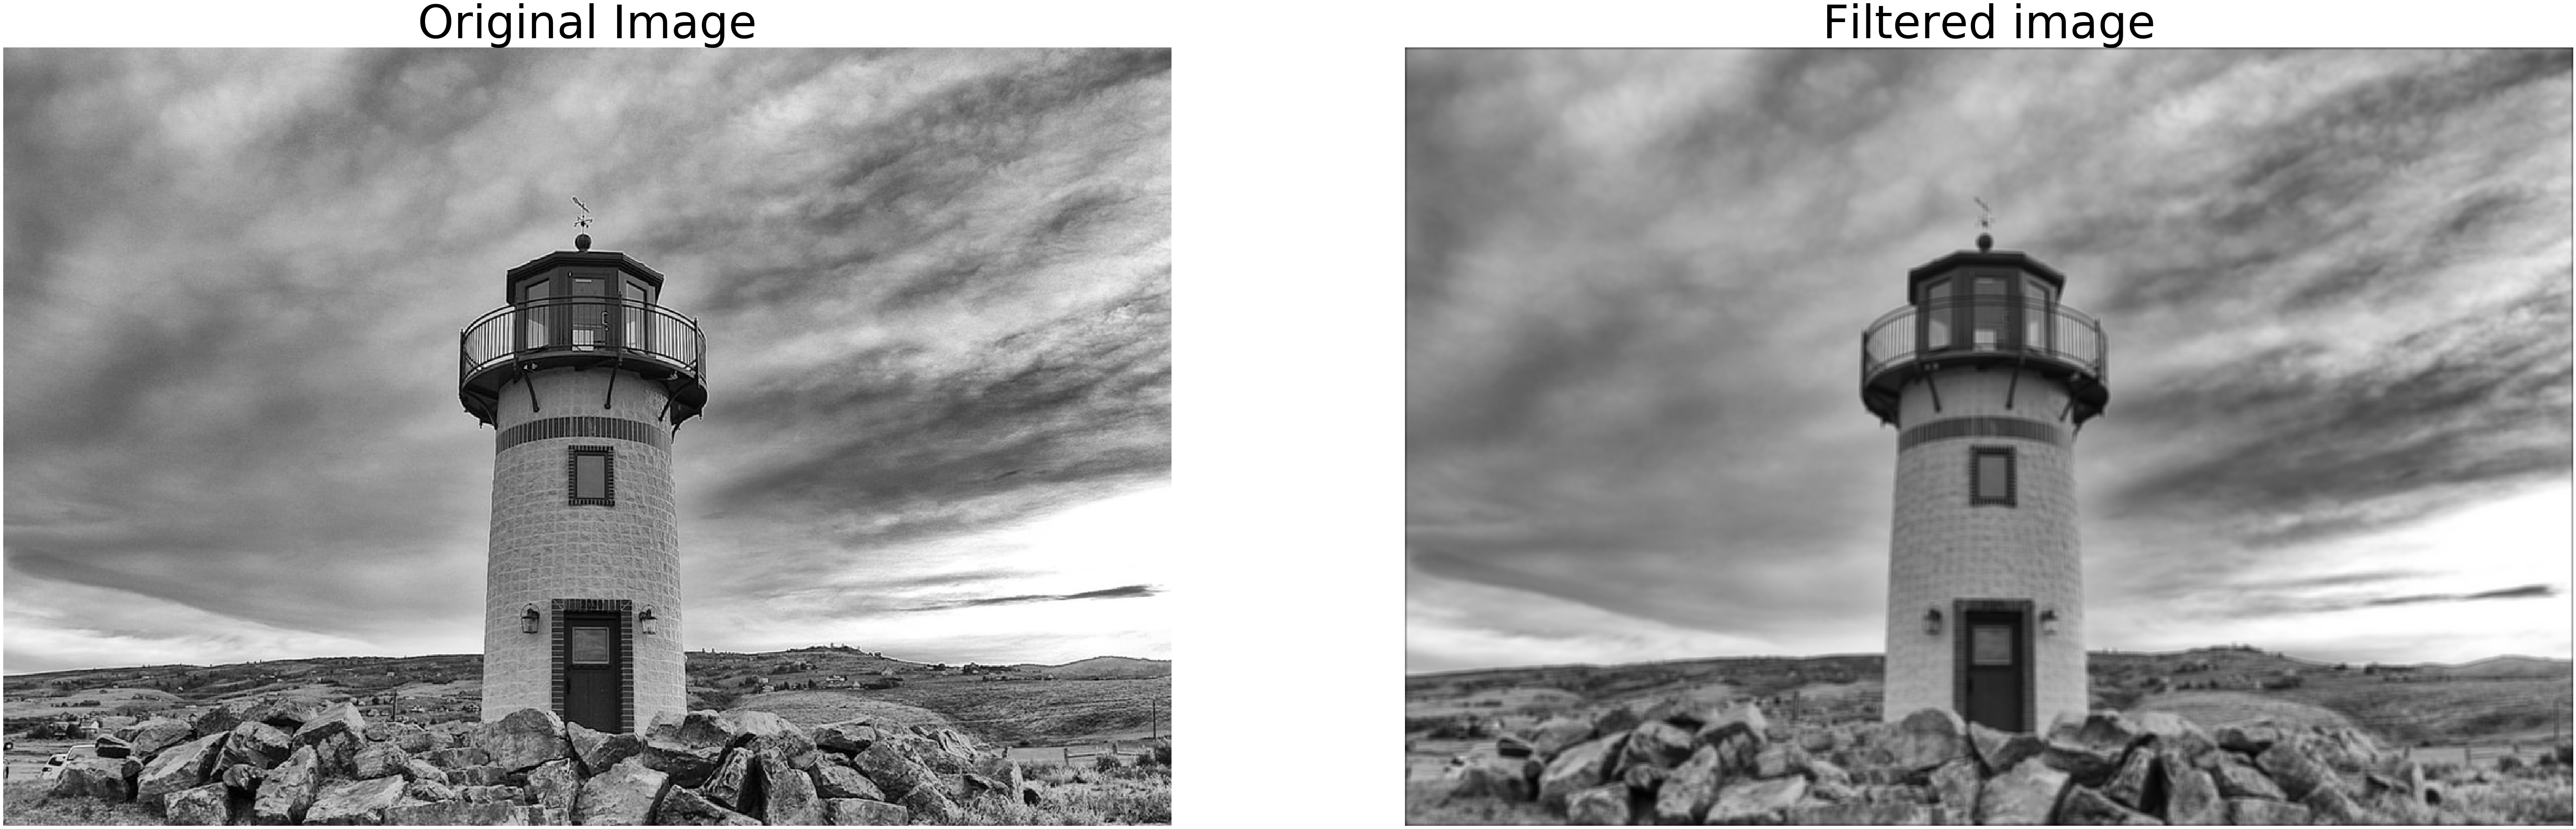

In [5]:
plt.figure(1,figsize=(100,100))
ax = plt.subplot(121)
ax.set_title("Original Image",fontsize=100)
displayImg(img)
ax = plt.subplot(122) 
ax.set_title("Filtered image",fontsize=100)
displayImg(resImg)
plt.show()

### Convolution

You can find the different types of filters used for convolution [here](https://en.wikipedia.org/wiki/Kernel_(image_processing))

In [13]:
#define kernel for convolution(we will be using a edge detection kernel)
convFilter= np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
print(convFilter)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [16]:
convImg = imread("images/opencv-logo.png")
convImg = cv2.cvtColor(convImg,cv2.COLOR_BGRA2GRAY)
h,w = convImg.shape
print(convImg.shape)

#pad image for applying convolution operation
paddedImg = np.pad(convImg,1,'constant',constant_values=(0))

#flipping the kernel
flippedConvFilter = np.flip(convFilter)

(739, 600)


In [17]:
#convolution operation
convRes = np.array([[(flippedConvFilter*paddedImg[y:y+3,x:x+3]).sum() for x in range(w)] for y in range(h)],'uint8')

#### Results of convolution

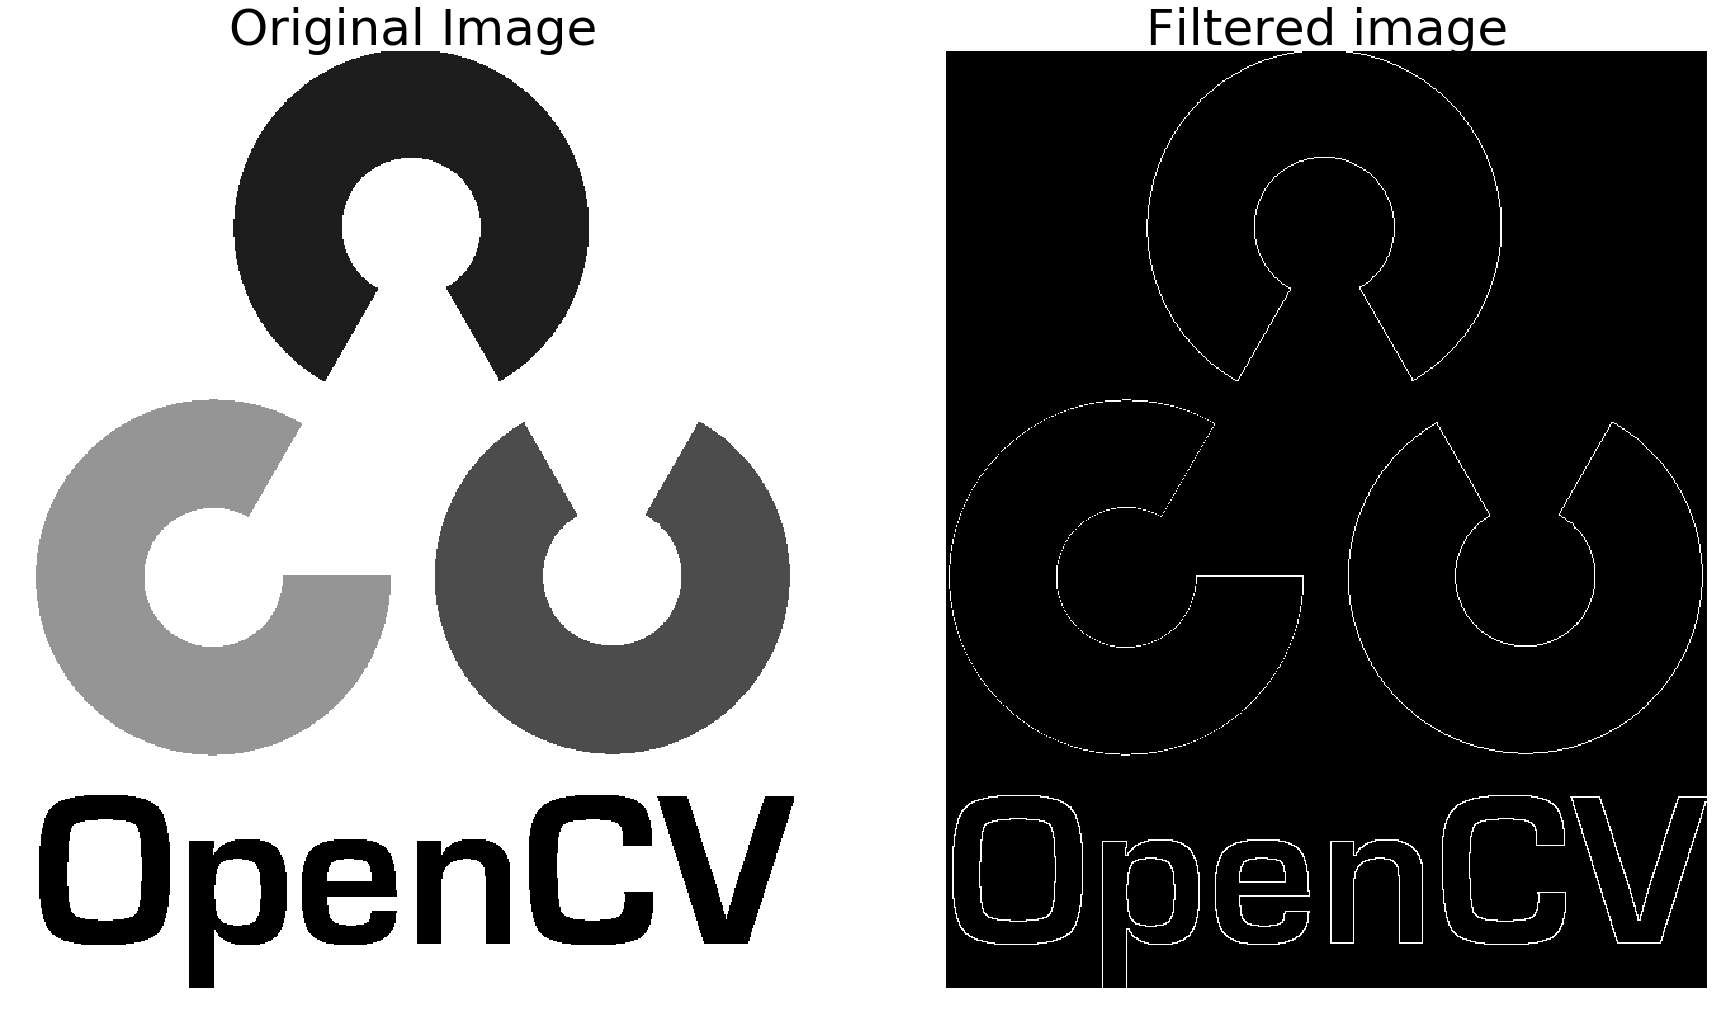

In [18]:
#plot both images
plt.figure(1,figsize=(30,30))
ax = plt.subplot(121)
ax.set_title("Original Image",fontsize=50)
displayImg(convImg)
ax = plt.subplot(122) 
ax.set_title("Filtered image",fontsize=50)
displayImg(convRes)
plt.show()

### Image Gradients

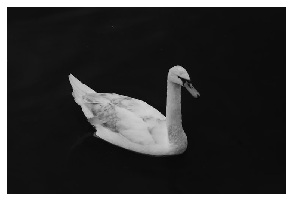

In [13]:
#load an image
img = cv2.imread("images/swan.jpg",0)
h,w = img.shape

plt.figure(1,figsize=(5,5))
displayImg(img)
plt.show()

#### Plotting Image Intensity

<IPython.core.display.Javascript object>


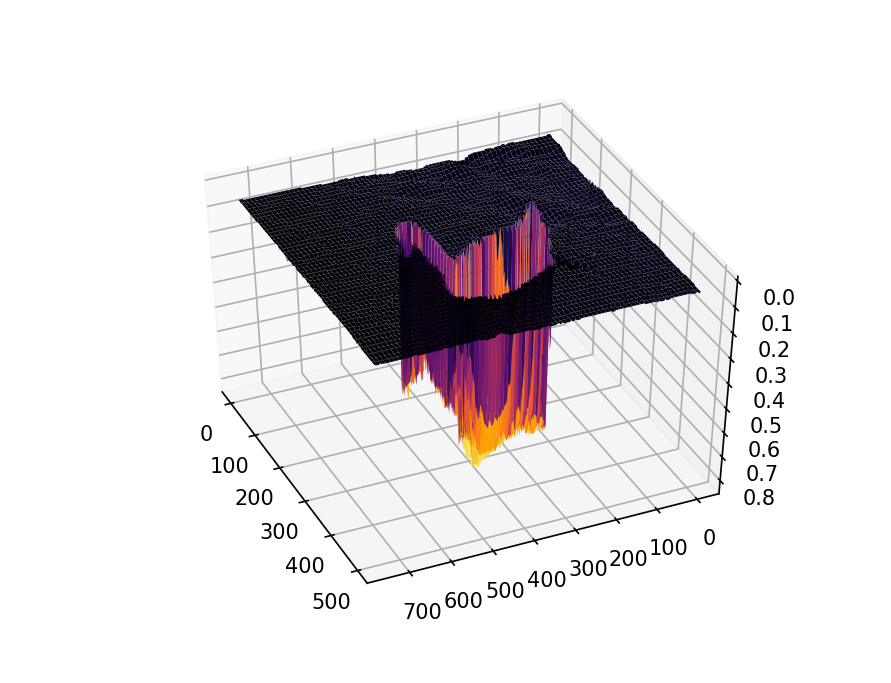

In [4]:
#plot image intensity
img = img/255.0
xx, yy = np.mgrid[0:h, 0:w]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img ,rstride=10, cstride=10, cmap=plt.cm.inferno,linewidth=0)
plt.show()

### Detecting Edges in Images

If you look at the intensity plot of the image of the duck, you notice the very sharp discontinuities at the edges. Thus we can use derivatives to detect edges in images because derivatives are very large at discontinuities.

In case of a discrete image we can use finite differences to compute the derivates.

In [20]:
img = imread("images/opencv-logo.png")
img = cv2.cvtColor(img,cv2.COLOR_BGRA2GRAY)
h,w = img.shape
print(img.shape)

#pad image for applying convolution operation
paddedImg = np.pad(img,1,'constant',constant_values=(0))

(739, 600)


#### Use Sobel filters for edge detection

In [22]:
#define horizontal sobel filter
horizontalSobelFilter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print(horizontalSobelFilter)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [29]:
#define vertical sobel filter
verticalSobelFilter = np.transpose(horizontalSobelFilter)
print(verticalSobelFilter)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


#### Apply horizontal Sobel Filter

In [54]:
#applying horizontal Sobel filter
horizontalGrad = [[(horizontalSobelFilter*paddedImg[y:y+3,x:x+3]).sum() for x in range(w)] for y in range(h)]
horizontalRes = np.array(horizontalGrad,'uint8')

#### Print result of horizontal Sobel Filter

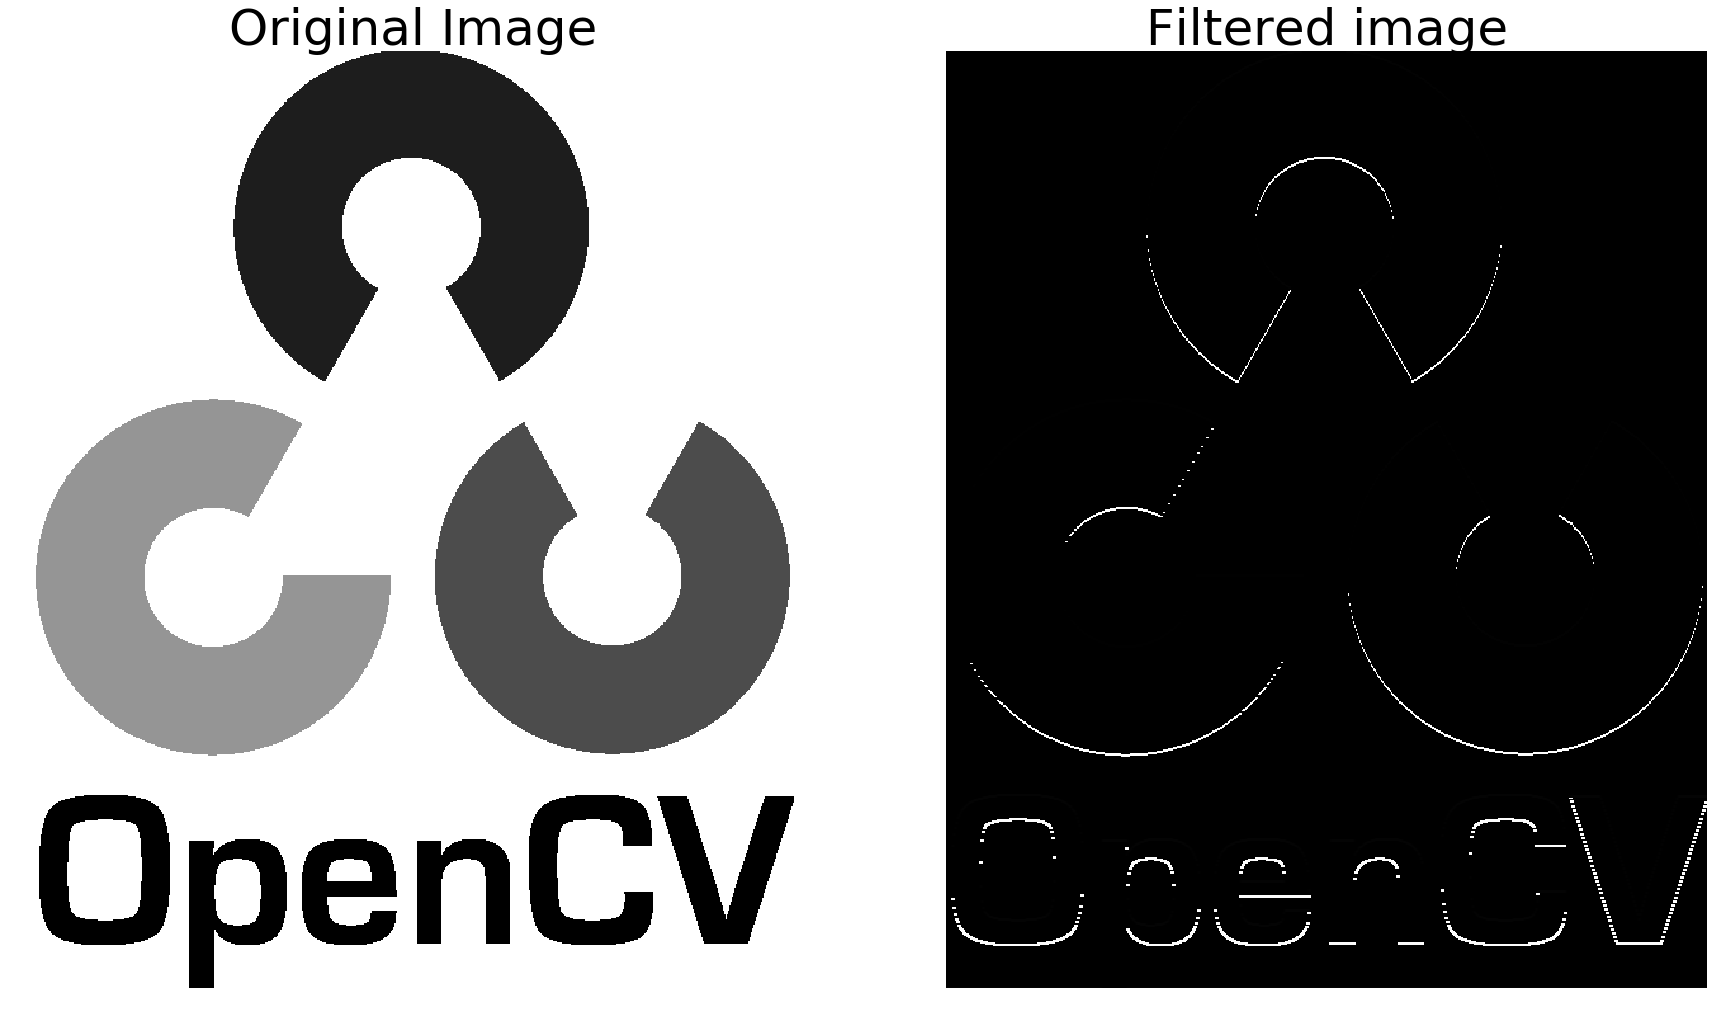

In [55]:
#plot both images
plt.figure(1,figsize=(30,30))
ax = plt.subplot(121)
ax.set_title("Original Image",fontsize=50)
displayImg(img)
ax = plt.subplot(122) 
ax.set_title("Filtered image",fontsize=50)
displayImg(horizontalRes)
plt.show()

#### Apply vertical Sobel Filter

In [56]:
#applying vertical Sobel filter
verticalGrad = [[(verticalSobelFilter*paddedImg[y:y+3,x:x+3]).sum() for x in range(w)] for y in range(h)]
verticalRes = np.array(verticalGrad,'uint8')

#### Print result of vertical Sobel Filter

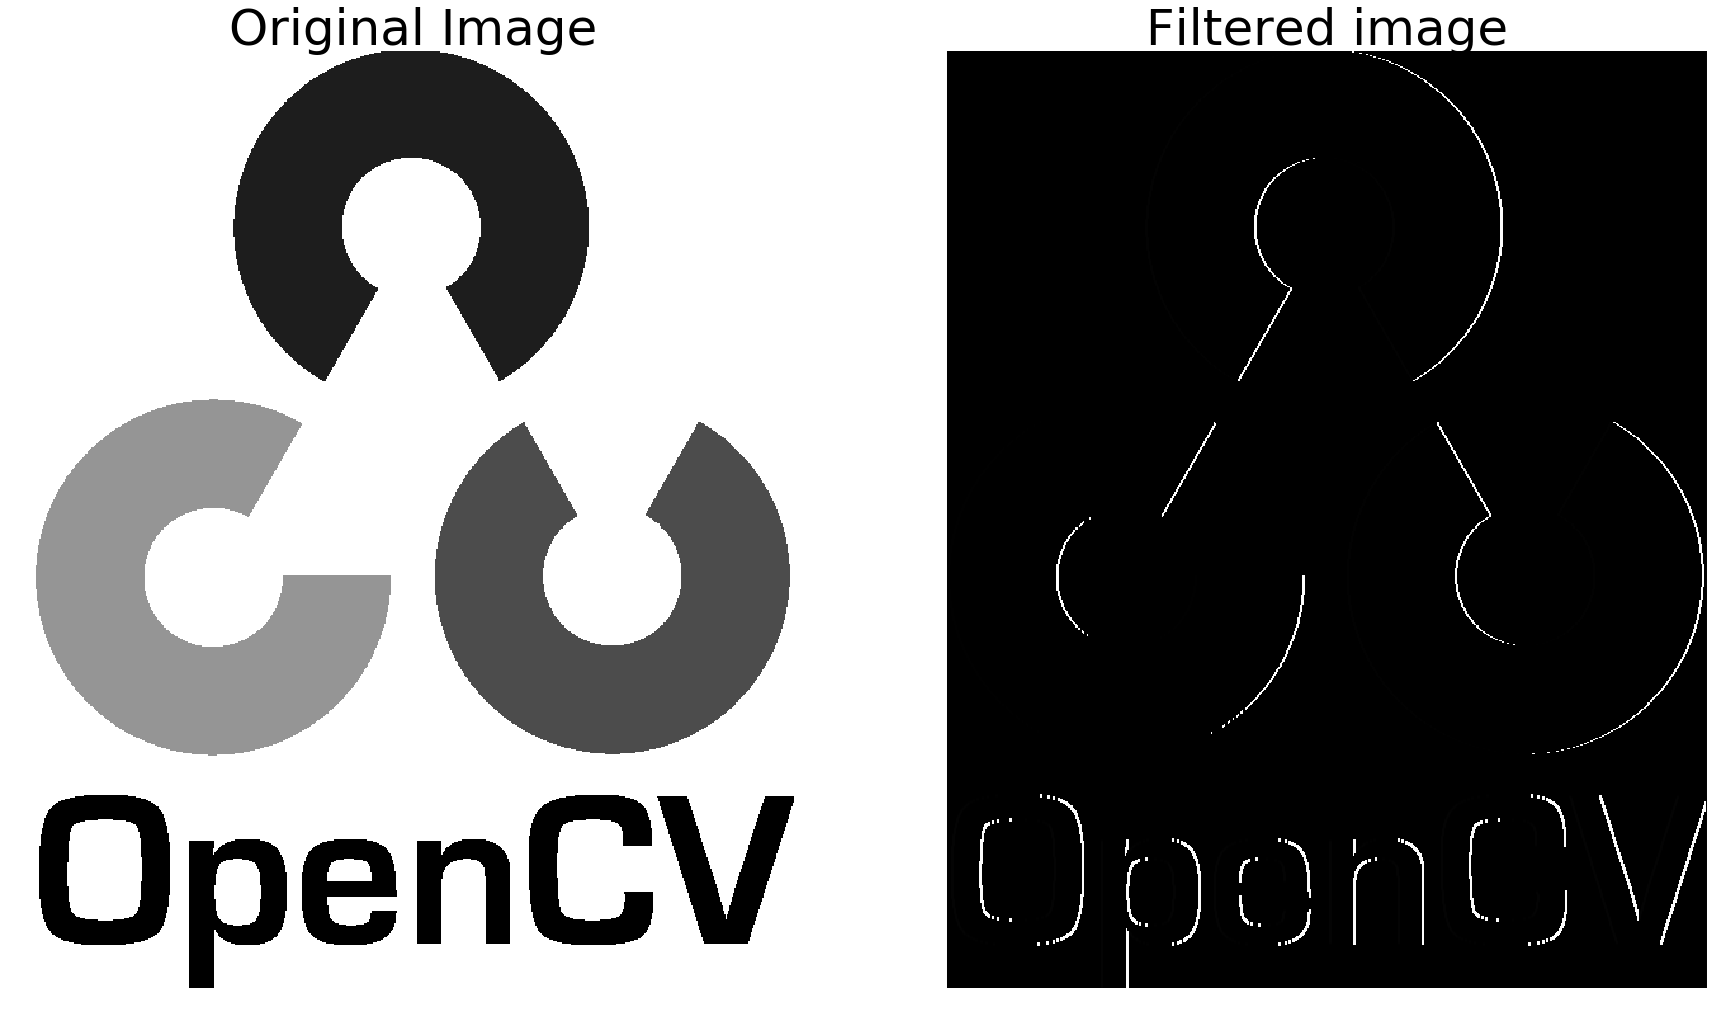

In [57]:
#plot both images
plt.figure(1,figsize=(30,30))
ax = plt.subplot(121)
ax.set_title("Original Image",fontsize=50)
displayImg(img)
ax = plt.subplot(122) 
ax.set_title("Filtered image",fontsize=50)
displayImg(verticalRes)
plt.show()

#### Gradient magnitude

In [85]:
horizontalGrad = np.array(horizontalRes,'int64')
verticalGrad = np.array(verticalRes,'int64')

In [86]:
ampRes = nnp.square(horizontalGrad) + np.square(verticalGrad)
ampRes = np.array(ampRes,'uint8')
print(ampRes)

[[101 252 252 ... 252 252 253]
 [252   0   0 ...   0   0   4]
 [252   0   0 ...   0   0   4]
 ...
 [252   0   0 ...   0   0   4]
 [252   0   0 ...   0   0   4]
 [253   4   4 ...   4   4   4]]


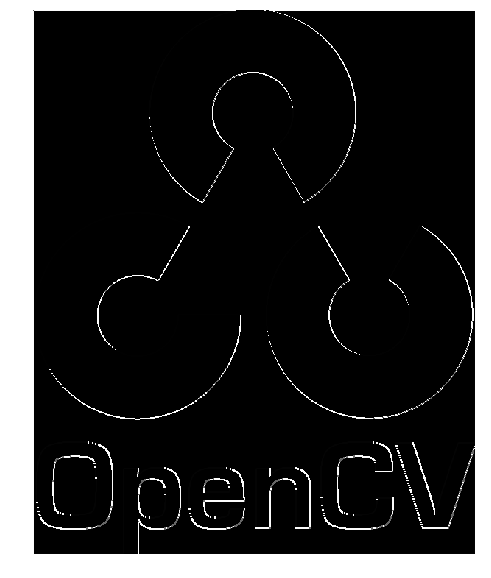

In [87]:
plt.figure(1,figsize=(10,10))
displayImg(ampRes)
plt.show()